In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=sns.load_dataset("titanic")
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
feature=["pclass","sex","fare","embarked","age"]
target=["survived"]
from sklearn.impute import SimpleImputer
#Fill the Null Value
num_imp=SimpleImputer(strategy='mean')
data[["age"]]=num_imp.fit_transform(data[["age"]])

cat_imp=SimpleImputer(strategy='most_frequent')
data[["embarked"]]=cat_imp.fit_transform(data[["embarked"]])
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
data["sex"]=le.fit_transform(data["sex"])
data["embarked"]=le.fit_transform(data["embarked"])

In [5]:
X=data[feature]
Y=data[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
#Model Design
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_predict=model.predict(X_test)
from sklearn.metrics import accuracy_score
print(f"Accurecy of the Model is {accuracy_score(Y_test,Y_predict)}")

Accurecy of the Model is 0.7597765363128491


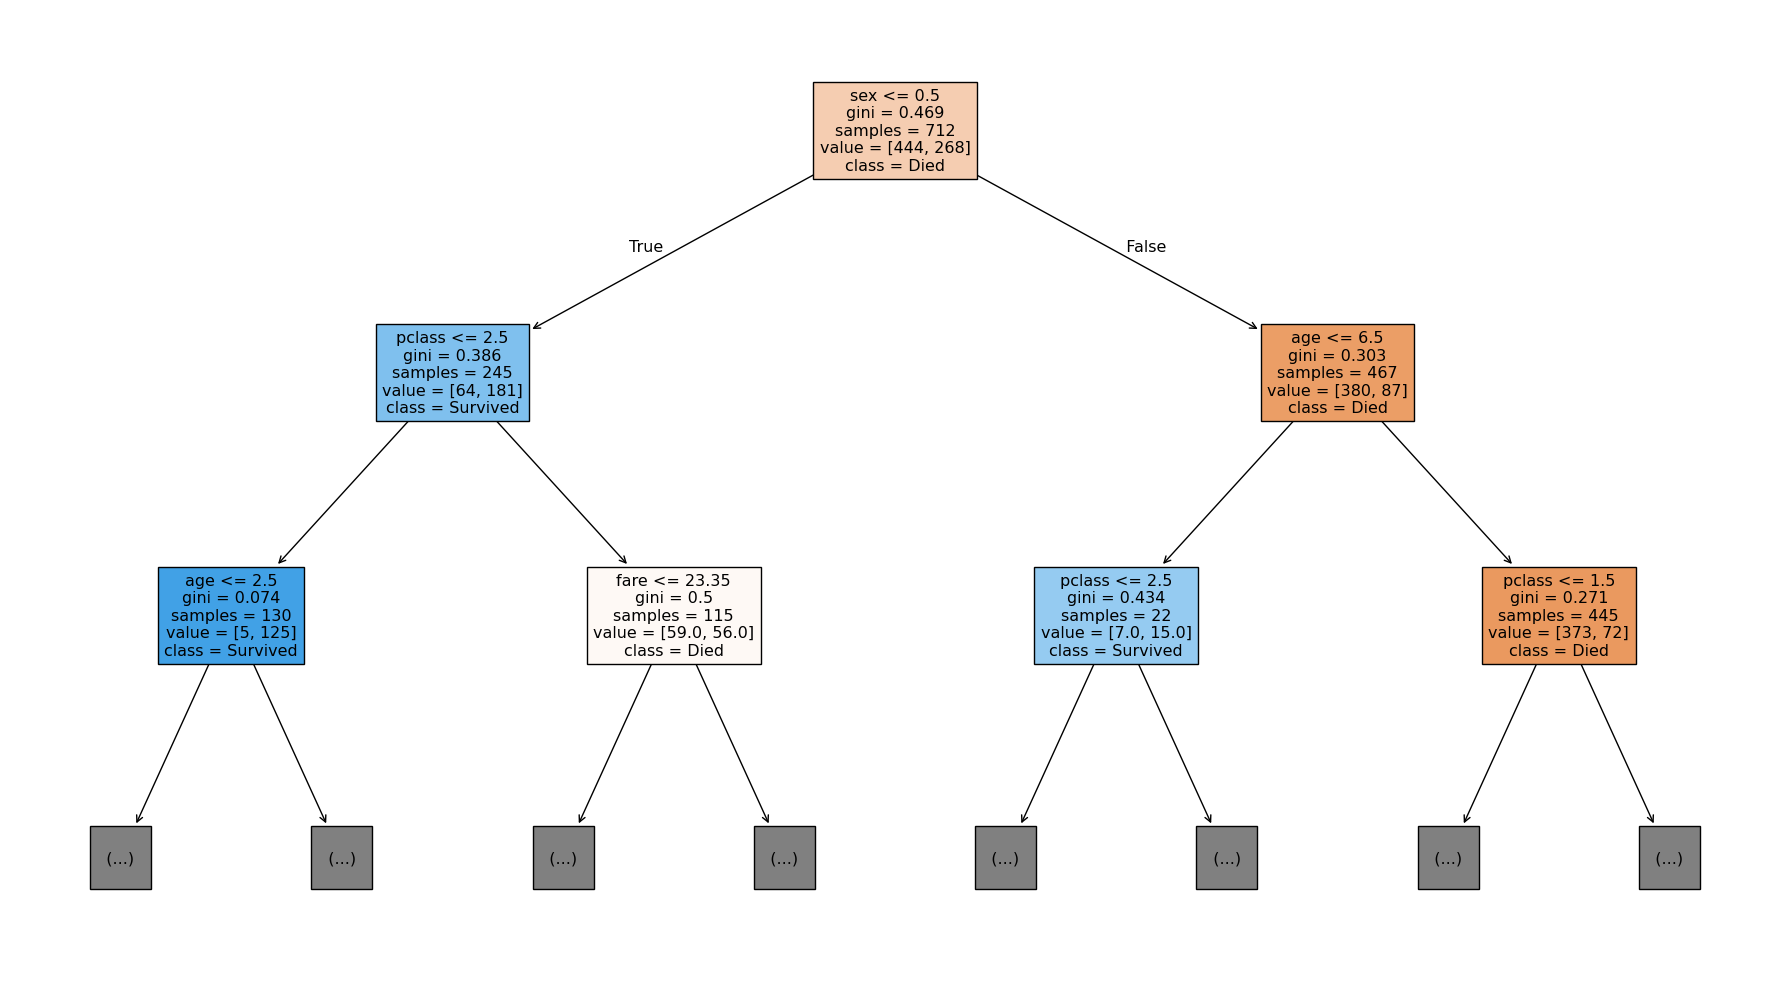

In [14]:
from sklearn.tree import plot_tree


In [22]:
max_depths=[2,3,4,5,6,7,8,9]
for depth in max_depths:
    model=DecisionTreeClassifier(max_depths=depth)
    model.fit(X_train,Y_train)
    acc=model.score(X_test,Y_test)
    print(f" for depth={depth} acc={acc}")
    if depth==6:
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True,
          
        )
        
        plt.tight_layout()
        plt.show()

TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'max_depths'. Did you mean 'max_depth'?

In [21]:
sample=[10,20,30,40,50]
for s in sample:
    model=DecisionTreeClassifier()
    model.fit(X_train,Y_train)
    acc=model.score(X_test,Y_test)
    print(f" for sample={s} acc={acc}")

 for sample=10 acc=0.7988826815642458
 for sample=20 acc=0.7932960893854749
 for sample=30 acc=0.7932960893854749
 for sample=40 acc=0.7988826815642458
 for sample=50 acc=0.8044692737430168
